In [213]:
# !pip install haversine

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## utils

In [215]:
from datetime import datetime

DATE_FMT = "%Y-%m-%d %H:%M:%S.%f %Z"


def iso_to_datetime(iso_str: str, date_format: str = DATE_FMT) -> datetime:
    """Converts a date in iso_str format to datetime object

    Args:
        iso_str: Date string in iso format, e.g. 2015-05-23 23:54:00.123 UTC
        date_format: Format of the date string to be parsed

    Returns:
        datetime object that represents the input date
    """
    return datetime.strptime(iso_str, date_format)


def hour_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    return iso_to_datetime(iso_str, date_format).hour


def robust_hour_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    try:
        return hour_of_iso_date(iso_str, date_format)
    except:
        return hour_of_iso_date(iso_str, "%Y-%m-%d %H:%M:%S %Z")


def weekday_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    return iso_to_datetime(iso_str, date_format).weekday()


def robust_weekday_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    try:
        return weekday_of_iso_date(iso_str, date_format)
    except:
        return weekday_of_iso_date(iso_str, "%Y-%m-%d %H:%M:%S %Z")


def day_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    _date = iso_to_datetime(iso_str, date_format)
    return int(_date.strftime("%Y%m%d"))


def robust_day_of_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    try:
        return day_of_iso_date(iso_str, date_format)
    except:
        return day_of_iso_date(iso_str, "%Y-%m-%d %H:%M:%S %Z")


def robust_iso_date(iso_str: str, date_format: str = DATE_FMT) -> int:
    try:
        return iso_to_datetime(iso_str, date_format)
    except:
        return iso_to_datetime(iso_str, "%Y-%m-%d %H:%M:%S %Z")

In [216]:
booking_log = pd.read_csv("data/raw/booking_log.csv")
print(booking_log.shape)
booking_log.head()

(699212, 8)


,event_timestamp,order_id,booking_status,customer_id,driver_id,trip_distance,pickup_latitude,pickup_longitude
0,2015-05-12 05:25:23.904 UTC,102254181112,CREATED,715281995014,NaN,2.0,-2.998461,104.788077
1,2015-05-12 05:25:24.67 UTC,102254181112,DRIVER_FOUND,715281995014,2.211727e+11,2.0,-2.998461,104.788077
2,2015-05-12 05:55:10.496544 UTC,102254181112,COMPLETED,715281995014,2.211727e+11,2.0,-2.998461,104.788077
3,2015-05-12 05:29:37.305 UTC,105520285203,CREATED,957980952237,NaN,2.0,-2.970621,104.756226
4,2015-05-12 05:29:38.214 UTC,105520285203,DRIVER_FOUND,957980952237,5.276724e+11,2.0,-2.970621,104.756226


In [217]:
print(booking_log["order_id"].nunique())
display(booking_log["booking_status"].value_counts())
display(booking_log.isna().sum())

185867


booking_status
CREATED               186036
DRIVER_FOUND          175987
PICKED_UP             152788
COMPLETED             152032
CUSTOMER_CANCELLED     28793
DRIVER_NOT_FOUND        2262
DRIVER_CANCELLED        1314
Name: count, dtype: int64

event_timestamp         92
order_id                 0
booking_status           0
customer_id              0
driver_id           194035
trip_distance            0
pickup_latitude          0
pickup_longitude         0
dtype: int64

In [218]:
unique_columns = [
    "order_id",
    "trip_distance",
    "pickup_latitude",
    "pickup_longitude",
]
booking_log = booking_log.drop_duplicates(subset=unique_columns)
booking_log = booking_log[unique_columns]

In [219]:
print(booking_log["order_id"].nunique())
print(booking_log.shape)

185867
(185867, 4)


In [220]:
# booking_log.dropna(subset=['event_timestamp'], inplace=True, ignore_index=True)

In [221]:
# booking_log['event_timestamp'] = booking_log['event_timestamp'].apply(robust_iso_date)
# booking_log = booking_log.sort_values(by='event_timestamp', ascending=True)
# booking_log = booking_log.drop_duplicates(subset=['order_id'], keep='last')

In [222]:
# print(booking_log['order_id'].nunique())
# display(booking_log['booking_status'].value_counts())
# display(booking_log.isna().sum())

In [223]:
participants = pd.read_csv("data/raw/participant_log.csv")
print(participants.shape)
participants.head()

(400230, 8)


,event_timestamp,driver_id,participant_status,order_id,experiment_key,driver_latitude,driver_longitude,driver_gps_accuracy
0,2015-05-18 11:45:19.519 UTC,110283102582,CREATED,938125906616,309579604593,-2.981389,104.761898,2.0
1,2015-05-18 11:45:29.8 UTC,110283102582,ACCEPTED,938125906616,309579604593,-2.981389,104.761898,2.0
2,2015-05-11 10:35:57.021 UTC,126346998414,CREATED,992080359113,941995970460,-2.966915,104.748040,2.0
3,2015-05-11 10:36:01.148 UTC,126346998414,ACCEPTED,992080359113,941995970460,-2.966915,104.748040,2.0
4,2015-05-16 12:34:20.044 UTC,199325048812,ACCEPTED,797723880713,197604093364,-3.014740,104.694647,2.0


In [224]:
print(participants["driver_id"].nunique())
print(participants["order_id"].nunique())
display(participants["participant_status"].value_counts())
display(participants.isna().sum())

14913
179697


participant_status
CREATED     200681
ACCEPTED    180753
IGNORED      17322
REJECTED      1474
Name: count, dtype: int64

event_timestamp        0
driver_id              0
participant_status     0
order_id               0
experiment_key         0
driver_latitude        0
driver_longitude       0
driver_gps_accuracy    0
dtype: int64

In [225]:
participants.drop_duplicates(
    subset=["driver_id", "order_id", "participant_status"],
    ignore_index=True,
    inplace=True,
)
print(participants.shape)
print(participants.order_id.nunique())

(400104, 8)
179697


In [226]:
chec = participants.drop_duplicates()
chec.shape
print(chec["driver_id"].shape)

(400104,)


In [227]:
# participants = participants.rename(columns={"driver_id": 'participant_id'})

In [228]:
# temp_df = participants.groupby(['participant_id', 'order_id'], as_index=False).agg({"participant_status": list})
# temp_df['participant_status'] = temp_df['participant_status'].apply(lambda x: sorted(x))
# temp_df['participant_status'].value_counts()

In [229]:
# participants = participants[participants['participant_status']!='CREATED'].reset_index(drop=True)

merged_df = participants.merge(booking_log, on=["order_id"], how="left")

print(merged_df.shape)
display(merged_df.isna().sum())

(400104, 11)


event_timestamp        0
driver_id              0
participant_status     0
order_id               0
experiment_key         0
driver_latitude        0
driver_longitude       0
driver_gps_accuracy    0
trip_distance          0
pickup_latitude        0
pickup_longitude       0
dtype: int64

In [230]:
merged_df.sort_values(by="event_timestamp").head()

,event_timestamp,driver_id,participant_status,order_id,experiment_key,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude
234920,2015-05-10 00:00:11.845 UTC,288223322155,CREATED,257432374014,135546226388,-2.995167,104.767443,87.600,1.428,-2.994609,104.767860
234921,2015-05-10 00:00:12.963 UTC,288223322155,ACCEPTED,257432374014,135546226388,-2.995167,104.767443,87.600,1.428,-2.994609,104.767860
154995,2015-05-10 00:00:16.174 UTC,552835747248,CREATED,811842312011,291923492741,-2.932598,104.789056,4.348,2.501,-2.936892,104.792555
43210,2015-05-10 00:00:19.332 UTC,869163565780,CREATED,613128887100,495307579739,-2.919218,104.716482,3.000,5.212,-2.921464,104.717112
43218,2015-05-10 00:00:19.926 UTC,869163565780,ACCEPTED,613128887100,495307579739,-2.919218,104.716482,3.000,5.212,-2.921464,104.717112


In [231]:
# merged_df['booking_status'] = np.where(
#     ((merged_df['participant_status'].isin(['IGNORED', 'REJECTED']))&(merged_df['booking_status']!='CREATED')),
#     'DRIVER_CANCELLED',
#     merged_df['booking_status']
# )

In [232]:
# merged_df.groupby(by=['participant_status', 'booking_status'], as_index=False)['order_id'].count()

In [233]:
# merged_df = merged_df[~((merged_df['booking_status']=='DRIVER_NOT_FOUND')&(merged_df['participant_status']=='ACCEPTED'))]

In [234]:
# merged_df['booking_status'].value_counts()

In [235]:
merged_df["event_day"] = merged_df["event_timestamp"].apply(robust_day_of_iso_date)

In [236]:
merged_df["participant_status"].value_counts()

participant_status
CREATED     200619
ACCEPTED    180703
IGNORED      17309
REJECTED      1473
Name: count, dtype: int64

In [237]:
# print(merged_df.head)
print(merged_df.shape)
print(merged_df["participant_status"].value_counts())

(400104, 12)
participant_status
CREATED     200619
ACCEPTED    180703
IGNORED      17309
REJECTED      1473
Name: count, dtype: int64


In [238]:
chec = merged_df.drop_duplicates(subset=["driver_id", "order_id"], keep="last")
chec.shape

(200619, 12)

In [239]:
driver_day_events = (
    merged_df[merged_df["participant_status"].isin(["ACCEPTED", "IGNORED", "REJECTED"])]
    .groupby(["driver_id", "event_day", "participant_status"], as_index=False)
    .agg(num_orders=pd.NamedAgg("order_id", lambda x: len(set(x))))
)
driver_day_events = driver_day_events.pivot(
    index=["driver_id", "event_day"],
    columns=["participant_status"],
    values=["num_orders"],
)
driver_day_events.columns = [
    "_".join(a) for a in driver_day_events.columns.to_flat_index()
]

In [240]:
driver_day_events.head()

num_orders_ACCEPTED  num_orders_IGNORED  \
driver_id    event_day                                            
100049799902 20150512                   1.0                 NaN   
100085508914 20150513                   2.0                 NaN   
             20150514                   1.0                 NaN   
             20150515                   2.0                 NaN   
             20150516                   NaN                 1.0   

                        num_orders_REJECTED  
driver_id    event_day                       
100049799902 20150512                   NaN  
100085508914 20150513                   NaN  
             20150514                   NaN  
             20150515                   NaN  
             20150516                   NaN

In [241]:
driver_day_events = (
    merged_df[merged_df["participant_status"].isin(["ACCEPTED", "IGNORED", "REJECTED"])]
    .groupby(["driver_id", "event_day", "participant_status"], as_index=False)
    .agg(num_orders=pd.NamedAgg("order_id", lambda x: len(set(x))))
)
driver_day_events = driver_day_events.pivot(
    index=["driver_id", "event_day"],
    columns=["participant_status"],
    values=["num_orders"],
)
driver_day_events.columns = [
    "_".join(a) for a in driver_day_events.columns.to_flat_index()
]

driver_day_events = driver_day_events.reset_index(drop=False)
driver_day_events.fillna(value=0.0, inplace=True)

driver_day_total = merged_df.groupby(["driver_id", "event_day"], as_index=False).agg(
    num_orders_TOTAL=pd.NamedAgg("order_id", lambda x: len(set(x)))
)

driver_day_events = driver_day_events.merge(
    driver_day_total, on=["driver_id", "event_day"], how="inner"
)
driver_day_events["acceptance_rate"] = (
    driver_day_events["num_orders_ACCEPTED"] / driver_day_events["num_orders_TOTAL"]
)
driver_day_events["rejection_rate"] = (
    driver_day_events["num_orders_REJECTED"] / driver_day_events["num_orders_TOTAL"]
)
driver_day_events["ignorance_rate"] = (
    driver_day_events["num_orders_IGNORED"] / driver_day_events["num_orders_TOTAL"]
)
# driver_day_events['ignore_rejection_rate'] = np.where(driver_day_events['num_orders_IGNORED']==0.0, driver_day_events['num_orders_REJECTED']/driver_day_events['num_orders_TOTAL'],
#                                                    np.where(driver_day_events['num_orders_REJECTED']==0.0, driver_day_events['num_orders_IGNORED']/driver_day_events['num_orders_TOTAL'],0.0))

driver_day_events

,driver_id,event_day,num_orders_ACCEPTED,num_orders_IGNORED,num_orders_REJECTED,num_orders_TOTAL,acceptance_rate,rejection_rate,ignorance_rate
0,100049799902,20150512,1.0,0.0,0.0,1,1.0,0.0,0.0
1,100085508914,20150513,2.0,0.0,0.0,2,1.0,0.0,0.0
2,100085508914,20150514,1.0,0.0,0.0,1,1.0,0.0,0.0
3,100085508914,20150515,2.0,0.0,0.0,2,1.0,0.0,0.0
4,100085508914,20150516,0.0,1.0,0.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
67520,999854671457,20150513,1.0,0.0,0.0,1,1.0,0.0,0.0
67521,999992366004,20150511,1.0,0.0,0.0,1,1.0,0.0,0.0
67522,999992366004,20150512,2.0,0.0,0.0,2,1.0,0.0,0.0
67523,999992366004,20150514,2.0,0.0,0.0,2,1.0,0.0,0.0


In [242]:
driver_day_events.describe()

,driver_id,event_day,num_orders_ACCEPTED,num_orders_IGNORED,num_orders_REJECTED,num_orders_TOTAL,acceptance_rate,rejection_rate,ignorance_rate
count,6.752500e+04,6.752500e+04,67525.000000,67525.000000,67525.000000,67525.000000,67525.000000,67525.000000,67525.000000
mean,5.522470e+11,2.015051e+07,2.676090,0.256335,0.021814,2.968752,0.901547,0.007565,0.087346
std,2.609924e+11,2.512509e+00,2.126046,0.790004,0.215673,2.276884,0.245317,0.071814,0.232605
min,1.000498e+11,2.015051e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.250706e+11,2.015051e+07,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,5.511356e+11,2.015051e+07,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,7.789959e+11,2.015052e+07,4.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
max,9.999924e+11,2.015052e+07,16.000000,36.000000,15.000000,37.000000,1.000000,1.000000,1.000000


In [243]:
# driver_day_events = (
#     merged_df[merged_df['participant_status'].isin(['ACCEPTED','REJECTED','IGNORED'])].groupby(
#         ['driver_id','participant_status','event_day'], as_index = False
#     ).agg(num_orders = pd.NamedAgg('order_id', lambda x: len(set(x))))
# )
# # print(driver_day_events)
# # print(driver_day_events['participant_status'].unique())

# driver_day_events = driver_day_events.pivot(index = ['driver_id','event_day'], columns = ['participant_status'], values = ['num_orders'])
# driver_day_events.columns = ['_'.join(a) for a in driver_day_events.columns.to_flat_index()]
# driver_day_events = driver_day_events.reset_index(drop = False)
# driver_day_events.fillna(0.0, inplace = True)
# print(driver_day_events)
# print(driver_day_events.shape)
# print(driver_day_events.driver_id.nunique())

In [244]:
# driver_day_total = merged_df.groupby(['event_day','driver_id'], as_index= False).agg(num_of_total = pd.NamedAgg('order_id', lambda x: len(set(x))))
# # print(driver_day_total)
# print(driver_day_total.shape)
# print(driver_day_total.driver_id.nunique())

# driver_day_fin = driver_day_events.merge(driver_day_total, on = ['driver_id','event_day'], how = 'inner')
# print(driver_day_fin)
# print(driver_day_fin.shape)
# print(driver_day_fin.driver_id.shape)

In [245]:
# driver_day_fin['acceptance_rate'] = driver_day_fin['num_orders_ACCEPTED']/driver_day_fin['num_of_total']
# driver_day_fin['rejection_rate'] = driver_day_fin['num_orders_REJECTED']/driver_day_fin['num_of_total']
# driver_day_fin['ignore_rate'] = driver_day_fin['num_orders_IGNORED']/driver_day_fin['num_of_total']
# driver_day_fin['ignore_rejection_rate'] = np.where(driver_day_fin['num_orders_IGNORED']==0.0, driver_day_fin['num_orders_REJECTED']/driver_day_fin['num_of_total'],
#                                                    np.where(driver_day_fin['num_orders_REJECTED']==0.0, driver_day_fin['num_orders_IGNORED']/driver_day_fin['num_of_total'],0.0))
# print(driver_day_fin.describe())

In [246]:
# driver_day_fin[driver_day_fin['num_of_total']==0]

In [247]:
driver_day_events = driver_day_events.merge(
    driver_day_events, on=["driver_id"], how="left"
)
driver_day_events = driver_day_events.loc[
    driver_day_events["event_day_x"] > driver_day_events["event_day_y"]
]
driver_day_events = driver_day_events.groupby(
    by=["driver_id", "event_day_x"], as_index=False
).agg(
    acceptance_rate=pd.NamedAgg("acceptance_rate_y", "mean"),
    rejection_rate=pd.NamedAgg("rejection_rate_y", "mean"),
    ignorance_rate=pd.NamedAgg("ignorance_rate_y", "mean"),
    # ignore_rejection_rate = pd.NamedAgg('ignore_rejection_rate_y', 'mean'),
    num_orders=pd.NamedAgg("num_orders_TOTAL_y", "sum"),
)
driver_day_events = driver_day_events.rename(columns={"event_day_x": "event_day"})

In [248]:
driver_day_events.describe()

,driver_id,event_day,acceptance_rate,rejection_rate,ignorance_rate,num_orders
count,5.262900e+04,5.262900e+04,52629.000000,52629.000000,52629.000000,52629.000000
mean,5.524375e+11,2.015051e+07,0.906307,0.006624,0.083375,10.498128
std,2.609971e+11,2.173234e+00,0.185958,0.053947,0.174980,9.864395
min,1.000855e+11,2.015051e+07,0.000000,0.000000,0.000000,1.000000
25%,3.253732e+11,2.015051e+07,0.888889,0.000000,0.000000,3.000000
50%,5.509641e+11,2.015052e+07,1.000000,0.000000,0.000000,7.000000
75%,7.792894e+11,2.015052e+07,1.000000,0.000000,0.093750,15.000000
max,9.999924e+11,2.015052e+07,1.000000,1.000000,1.000000,79.000000


In [249]:
merged_df.shape
merged_df.head()

,event_timestamp,driver_id,participant_status,order_id,experiment_key,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,event_day
0,2015-05-18 11:45:19.519 UTC,110283102582,CREATED,938125906616,309579604593,-2.981389,104.761898,2.0,5.601,-2.980337,104.761200,20150518
1,2015-05-18 11:45:29.8 UTC,110283102582,ACCEPTED,938125906616,309579604593,-2.981389,104.761898,2.0,5.601,-2.980337,104.761200,20150518
2,2015-05-11 10:35:57.021 UTC,126346998414,CREATED,992080359113,941995970460,-2.966915,104.748040,2.0,1.744,-2.968359,104.749344,20150511
3,2015-05-11 10:36:01.148 UTC,126346998414,ACCEPTED,992080359113,941995970460,-2.966915,104.748040,2.0,1.744,-2.968359,104.749344,20150511
4,2015-05-16 12:34:20.044 UTC,199325048812,ACCEPTED,797723880713,197604093364,-3.014740,104.694647,2.0,2.505,-3.013223,104.700030,20150516


In [250]:
merged_df["event_ts"] = merged_df["event_timestamp"].apply(robust_iso_date)
merged_df = merged_df.sort_values(by="event_ts", ascending=True)
merged_df = merged_df.drop_duplicates(subset=["order_id", "driver_id"], keep="last")

In [251]:
print(merged_df["participant_status"].value_counts())
print(merged_df.shape)

participant_status
ACCEPTED    180703
IGNORED      17309
REJECTED      1473
CREATED       1134
Name: count, dtype: int64
(200619, 13)


In [252]:
# print(merged_df['participant_status'].value_counts())
# print(merged_df.shape)

In [253]:
merged_df["is_completed"] = merged_df["participant_status"].apply(
    lambda x: int(x == "ACCEPTED")
)

merged_df["is_completed"].value_counts()

is_completed
1    180703
0     19916
Name: count, dtype: int64

In [254]:
print(merged_df.columns)
print(merged_df["participant_status"].value_counts())

Index(['event_timestamp', 'driver_id', 'participant_status', 'order_id',
       'experiment_key', 'driver_latitude', 'driver_longitude',
       'driver_gps_accuracy', 'trip_distance', 'pickup_latitude',
       'pickup_longitude', 'event_day', 'event_ts', 'is_completed'],
      dtype='object')
participant_status
ACCEPTED    180703
IGNORED      17309
REJECTED      1473
CREATED       1134
Name: count, dtype: int64


In [255]:
merged_df = merged_df.drop(columns=["experiment_key", "participant_status"])
merged_df.columns

Index(['event_timestamp', 'driver_id', 'order_id', 'driver_latitude',
       'driver_longitude', 'driver_gps_accuracy', 'trip_distance',
       'pickup_latitude', 'pickup_longitude', 'event_day', 'event_ts',
       'is_completed'],
      dtype='object')

In [256]:
print(merged_df.shape)
print(merged_df["driver_id"].nunique())
print(merged_df["order_id"].nunique())
print(driver_day_events.shape)
print(driver_day_events["driver_id"].nunique())

(200619, 12)
14913
179697
(52629, 6)
12605


In [257]:
merged_df = merged_df.merge(
    driver_day_events, on=["driver_id", "event_day"], how="left"
)
merged_df = merged_df.drop(columns=["event_day"])
# merged_df = merged_df.loc[merged_df['event_day_x']>merged_df['event_day_y']]
merged_df.head()

,event_timestamp,driver_id,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,event_ts,is_completed,acceptance_rate,rejection_rate,ignorance_rate,num_orders
0,2015-05-10 00:00:12.963 UTC,288223322155,257432374014,-2.995167,104.767443,87.600,1.428,-2.994609,104.767860,2015-05-10 00:00:12.963,1,NaN,NaN,NaN,NaN
1,2015-05-10 00:00:19.926 UTC,869163565780,613128887100,-2.919218,104.716482,3.000,5.212,-2.921464,104.717112,2015-05-10 00:00:19.926,1,NaN,NaN,NaN,NaN
2,2015-05-10 00:00:21.298 UTC,552835747248,811842312011,-2.932598,104.789056,4.348,2.501,-2.936892,104.792555,2015-05-10 00:00:21.298,1,NaN,NaN,NaN,NaN
3,2015-05-10 00:00:21.48 UTC,484447596668,719189764913,-3.012998,104.746118,3.900,7.718,-3.012023,104.746139,2015-05-10 00:00:21.480,1,NaN,NaN,NaN,NaN
4,2015-05-10 00:00:24.063 UTC,678397441848,518904942900,-2.975489,104.723962,4.251,3.175,-2.972137,104.724829,2015-05-10 00:00:24.063,1,NaN,NaN,NaN,NaN


In [258]:
print(merged_df.shape)
display(merged_df.isna().sum())

(200619, 15)


event_timestamp            0
driver_id                  0
order_id                   0
driver_latitude            0
driver_longitude           0
driver_gps_accuracy        0
trip_distance              0
pickup_latitude            0
pickup_longitude           0
event_ts                   0
is_completed               0
acceptance_rate        35267
rejection_rate         35267
ignorance_rate         35267
num_orders             35267
dtype: int64

In [259]:
merged_df.fillna(0.0, inplace=True)

In [260]:
# merged_df["event_timestamp"] = merged_df["event_timestamp"].apply(robust_hour_of_iso_date)
merged_df["event_hour"] = merged_df["event_timestamp"].apply(robust_hour_of_iso_date)
merged_df["event_weekday"] = merged_df["event_timestamp"].apply(
    robust_weekday_of_iso_date
)

In [261]:
from haversine import haversine


def driver_distance_to_pickup(df: pd.DataFrame) -> pd.DataFrame:
    df["driver_distance"] = df.apply(
        lambda r: haversine(
            (r["driver_latitude"], r["driver_longitude"]),
            (r["pickup_latitude"], r["pickup_longitude"]),
        ),
        axis=1,
    )
    return df


merged_df = driver_distance_to_pickup(merged_df)
merged_df.head()

,event_timestamp,driver_id,order_id,driver_latitude,driver_longitude,driver_gps_accuracy,trip_distance,pickup_latitude,pickup_longitude,event_ts,is_completed,acceptance_rate,rejection_rate,ignorance_rate,num_orders,event_hour,event_weekday,driver_distance
0,2015-05-10 00:00:12.963 UTC,288223322155,257432374014,-2.995167,104.767443,87.600,1.428,-2.994609,104.767860,2015-05-10 00:00:12.963,1,0.0,0.0,0.0,0.0,0,6,0.077425
1,2015-05-10 00:00:19.926 UTC,869163565780,613128887100,-2.919218,104.716482,3.000,5.212,-2.921464,104.717112,2015-05-10 00:00:19.926,1,0.0,0.0,0.0,0.0,0,6,0.259284
2,2015-05-10 00:00:21.298 UTC,552835747248,811842312011,-2.932598,104.789056,4.348,2.501,-2.936892,104.792555,2015-05-10 00:00:21.298,1,0.0,0.0,0.0,0.0,0,6,0.615581
3,2015-05-10 00:00:21.48 UTC,484447596668,719189764913,-3.012998,104.746118,3.900,7.718,-3.012023,104.746139,2015-05-10 00:00:21.480,1,0.0,0.0,0.0,0.0,0,6,0.108441
4,2015-05-10 00:00:24.063 UTC,678397441848,518904942900,-2.975489,104.723962,4.251,3.175,-2.972137,104.724829,2015-05-10 00:00:24.063,1,0.0,0.0,0.0,0.0,0,6,0.384910


In [262]:
# merged_df.describe()

In [263]:
merged_df.columns

Index(['event_timestamp', 'driver_id', 'order_id', 'driver_latitude',
       'driver_longitude', 'driver_gps_accuracy', 'trip_distance',
       'pickup_latitude', 'pickup_longitude', 'event_ts', 'is_completed',
       'acceptance_rate', 'rejection_rate', 'ignorance_rate', 'num_orders',
       'event_hour', 'event_weekday', 'driver_distance'],
      dtype='object')

In [264]:
feature_cols = [
    "event_hour",
    "event_weekday",
    "trip_distance",
    "acceptance_rate",
    "rejection_rate",
    "ignorance_rate",
    "num_orders",
    "driver_distance",
    "driver_gps_accuracy",
]
label_col = "is_completed"

# feature_cols

In [265]:
int("1")

1

[]

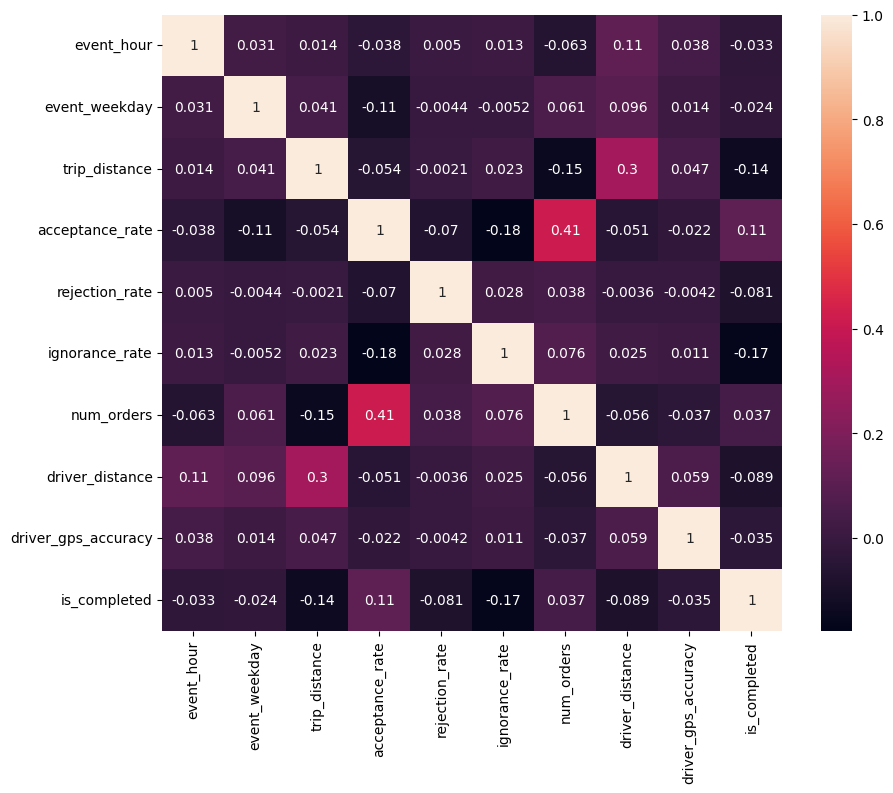

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

x = merged_df[feature_cols + [label_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(x, annot=True)
plt.plot()

In [267]:
# feature_cols.remove("ignore_rejection_rate")

In [268]:
# merged_df.head()

In [269]:
merged_df.is_completed.value_counts()

is_completed
1    180703
0     19916
Name: count, dtype: int64

In [270]:
X = merged_df[feature_cols]
y = merged_df[label_col]
print(X.shape)
print(y.shape)

(200619, 9)
(200619,)


In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    f1_score,
)
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [272]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [273]:
def evaluate(y_true, y_pred, y_pred_proba):
    print("Confusion Matrix")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    print("f1-score", f1_score(y_true, y_pred))


evaluate(y_test, y_pred, y_pred_proba)

Confusion Matrix
[[ 1248  2735]
 [ 3287 32854]]
Classification Report
              precision    recall  f1-score   support

           0       0.28      0.31      0.29      3983
           1       0.92      0.91      0.92     36141

    accuracy                           0.85     40124
   macro avg       0.60      0.61      0.60     40124
weighted avg       0.86      0.85      0.85     40124

f1-score 0.9160462846786561


In [274]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid, cv=5, scoring="f1_micro", n_jobs=-1
)
grid_search.fit(X_train_res, y_train_res)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
evaluate(y_test, y_pred, y_pred_proba)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
0.8980092405572698
Confusion Matrix
[[ 1278  2705]
 [ 3231 32910]]
Classification Report
              precision    recall  f1-score   support

           0       0.28      0.32      0.30      3983
           1       0.92      0.91      0.92     36141

    accuracy                           0.85     40124
   macro avg       0.60      0.62      0.61     40124
weighted avg       0.86      0.85      0.86     40124

f1-score 0.9172752104353642


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.32      0.30      3983
           1       0.92      0.91      0.92     36141

    accuracy                           0.85     40124
   macro avg       0.60      0.62      0.61     40124
weighted avg       0.86      0.85      0.86     40124

ROC AUC Score: 0.6967652873624111
f1-score: 0.9172752104353642
confusiion_matrix: [[ 1278  2705]
 [ 3231 32910]]


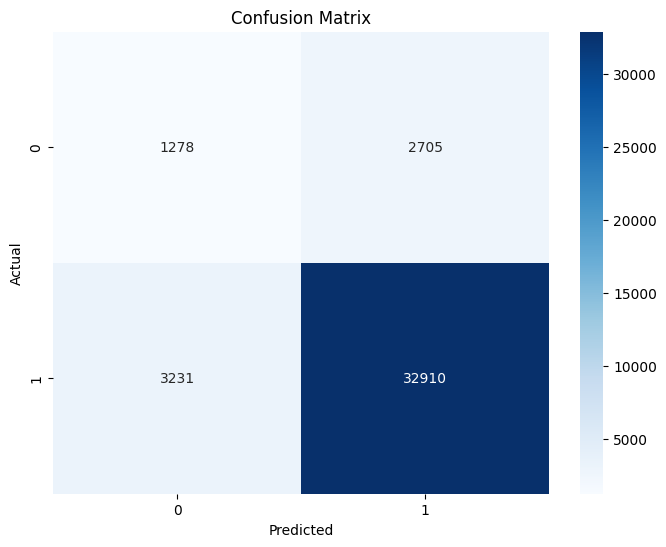

In [275]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("f1-score:", f1_score(y_test, y_pred))
print("confusiion_matrix:", confusion_matrix(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
rf_model = RandomForestClassifier(
    random_state=42, n_jobs=-1, max_depth=15, min_samples_split=2, n_estimators=150
)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

evaluate(y_test, y_pred, y_pred_proba)

Confusion Matrix
[[ 1712  2271]
 [ 6159 29982]]
Classification Report
              precision    recall  f1-score   support

           0       0.22      0.43      0.29      3983
           1       0.93      0.83      0.88     36141

    accuracy                           0.79     40124
   macro avg       0.57      0.63      0.58     40124
weighted avg       0.86      0.79      0.82     40124

f1-score 0.8767435739977191


In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_model = GradientBoostingClassifier(random_state=42)
gbdt_model.fit(X_train_res, y_train_res)

y_pred = gbdt_model.predict(X_test)
y_pred_proba = gbdt_model.predict_proba(X_test)[:, 1]

evaluate(y_test, y_pred, y_pred_proba)

Confusion Matrix
[[ 2084  1899]
 [ 8864 27277]]
Classification Report
              precision    recall  f1-score   support

           0       0.19      0.52      0.28      3983
           1       0.93      0.75      0.84     36141

    accuracy                           0.73     40124
   macro avg       0.56      0.64      0.56     40124
weighted avg       0.86      0.73      0.78     40124

f1-score 0.8352190088338411


In [96]:
test_data = pd.read_csv("data/raw/test_data.csv")
test_data.head()

,event_timestamp,order_id,customer_id,trip_distance,pickup_latitude,pickup_longitude,driver_id,driver_latitude,driver_longitude,driver_gps_accuracy
0,2015-05-20 05:31:12.822 UTC,300202530411,470195505600,2.0,-2.977965,104.77559,578486386000,-2.979892,104.775853,104.100
1,2015-05-20 05:31:12.822 UTC,300202530411,470195505600,2.0,-2.977965,104.77559,919898718450,-2.979352,104.772134,22.235
2,2015-05-20 05:31:12.822 UTC,300202530411,470195505600,2.0,-2.977965,104.77559,566354734208,-2.978990,104.778163,3.900
3,2015-05-20 05:31:12.822 UTC,300202530411,470195505600,2.0,-2.977965,104.77559,996326998494,-2.979434,104.775919,3.000
4,2015-05-20 05:31:12.822 UTC,300202530411,470195505600,2.0,-2.977965,104.77559,110774820109,-2.979365,104.776071,4.288


In [ ]:
# null_driver_id = booking_log[(booking_log['driver_id'].isna())]
# print(null_driver_id[
#     (booking_log['booking_status']=='CUSTOMER_CANCELLED')|
#     (booking_log['booking_status']=='DRIVER_NOT_FOUND')|
#     (booking_log['booking_status']=='CREATED')
# ].shape)

In [ ]:
# null_event_ts = booking_log[booking_log['event_timestamp'].isna()]
# null_event_ts = null_event_ts[['order_id']]
# booking_log.merge(null_event_ts, on=['order_id'], how='inner')

In [ ]:
# booking_log = booking_log.dropna(subset=['driver_id', 'event_timestamp'], ignore_index=True)